<a href="https://colab.research.google.com/github/mars241/PYTHON/blob/main/AAM_WCS_Matplotlib_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

# Exécutez le code ci-dessous :

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

# Vous avez maintenant un DataFrame avec des données météorologiques

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :

# Maintenant, effectuez les tâches suivantes :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis.

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

# 4 graphiques
Vous devez montrer une figure avec 4 sous-graphes :
- Pour le graphique en haut à gauche : un nuage de points avec les températures MAX (en rouge) et MIN (en bleu) (axe des ordonnées), et la date en axe des abscisses.
- Pour le graphique en haut à droite : [un camembert](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html) avec les fréquences des opinions. Pourriez-vous "exploser" la partie "très bien" ?
- Pour la partie en bas à gauche : un zoom sur le mois de janvier, avec les températures MAX sur un graphique en colonne (barre), et les températures MIN sur une courbe (plot). La date est en abscisse.
- Pour le graphique en bas à droite : [un histogramme ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)avec les températures MAX en abscisse.

Chaque graphique doit avoir un titre, une légende pour les couleurs, et bien sûr, des axes lisibles (ticks).

Voici un exemple de ce qui est attendu :

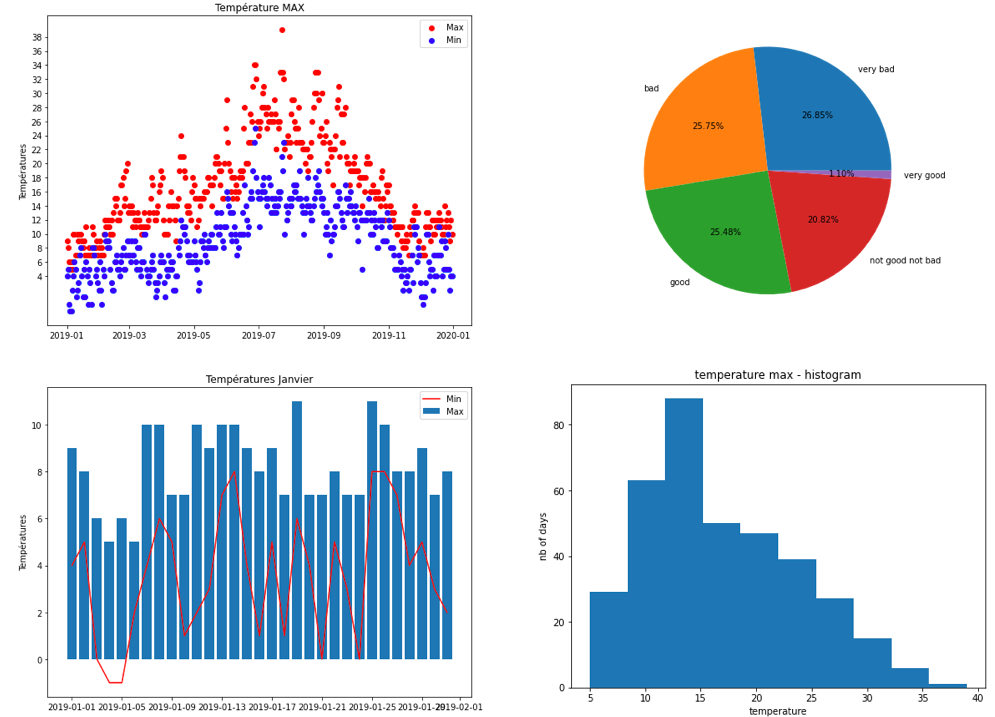

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C  365 non-null    int64         
 2   MIN_TEMPERATURE_C  365 non-null    int64         
 3   OPINION            365 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 11.5+ KB


In [ ]:
pie_df = pd.DataFrame(round(df_weather['OPINION'].value_counts() / df_weather['OPINION'].value_counts().sum() * 100,2)).reset_index()
pie_df = pie_df.rename(columns={"index": "OPINION", "OPINION": "OP_VAL"})
pie_labels = pie_df['OPINION'].unique().tolist()
pie_weight = pie_df['OP_VAL']
pie_labels
pie_weight

0    26.85
1    25.75
2    25.48
3    20.82
4     1.10
Name: OP_VAL, dtype: float64

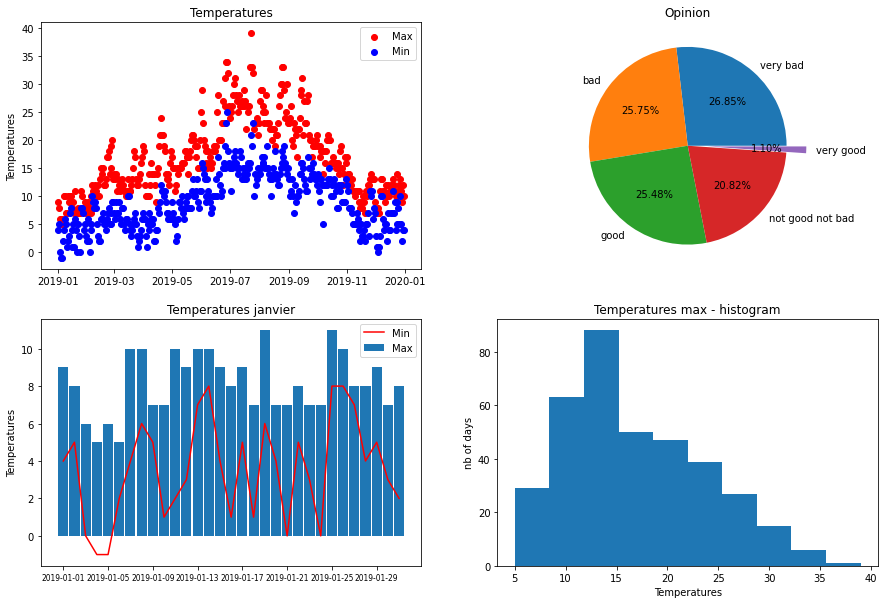

In [ ]:
# Create a figure
fig, temp = plt.subplots(figsize = (15,10), nrows=2, ncols=2)

# Create 1st scatterplot chart (position 1)
temp[0][0].scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red')
temp[0][0].scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue')
temp[0][0].set_title('Temperatures')
temp[0][0].set_ylabel('Temperatures')
temp[0][0].legend(['Max','Min'])

# Create 2nd pie chart (position 2)
pie_df = pd.DataFrame(round(df_weather['OPINION'].value_counts() / df_weather['OPINION'].value_counts().sum() * 100,2)).reset_index()
pie_df = pie_df.rename(columns={"index": "OPINION", "OPINION": "OP_VAL"})
pie_labels = pie_df['OPINION'].unique().tolist()
pie_weight = pie_df['OP_VAL']
temp[0][1].pie(pie_weight, explode = (0,0,0,0,0.2), labels = pie_labels, autopct='%.2f%%')
temp[0][1].set_title('Opinion')

# Create 3rd histogram chart (position 3)
df_january = df_weather.loc[(df_weather['DATE']>= "2019-01-01") & (df_weather['DATE']< "2019-02-01")]
temp[1][0].bar(df_january["DATE"], df_january["MAX_TEMPERATURE_C"], width = 0.9)
temp[1][0].plot(df_january["DATE"], df_january["MIN_TEMPERATURE_C"], c= 'red')
temp[1][0].set_title('Temperatures janvier')
temp[1][0].set_ylabel('Temperatures')
temp[1][0].tick_params(axis='x', labelsize=7.5)
temp[1][0].xaxis.set_major_locator(plt.MaxNLocator(9))
temp[1][0].legend(['Min', 'Max'])

# Create 4th bar chart (position 4)
temp[1][1].hist(df_weather["MAX_TEMPERATURE_C"])
temp[1][1].set_title('Temperatures max - histogram')
temp[1][1].set_xlabel('Temperatures')
temp[1][1].set_ylabel('nb of days')

plt.show()

In [ ]:
# Other possible solution for pie chart:
plt.subplot(222)
df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?
plt.pie(x = (df_weather['OPINION'].value_counts()), labels=df_weather['OPINION'].value_counts().index,autopct='%1.1f%%')

# Other possible solution for pie chart:
plt.axis[0,1].pie(df_weather['OPINION'].value_counts(), labels = df_weather['OPINION'].value_counts().index, explode = (0,0,0,0,0.3), autopct='%1.2f%%')

In [ ]:
# Other possible solution for hist chart:
plt.subplot(224)
plt.hist(df_weather.MAX_TEMPERATURE_C)
plt.ylabel("nb of days")
plt.xlabel("temperature")
plt.title("temperature max - histogram")

# Other possible solution for hist chart:

plt.plot(df_weather['DATE'],df_weather['MIN_TEMPERATURE_C'], color = 'red', label = 'Min')
plt.bar(df_weather['DATE'],df_weather['MAX_TEMPERATURE_C'], color = 'lightblue', label = 'Max')
plt.title("Temperatures January", size = 14)
plt.legend(loc='upper right', title_fontsize = 10)
## Focus on January :
plt.xlim(df_weather['DATE'][0],df_weather['DATE'][30])
plt.ylim(-3,12)

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) :
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

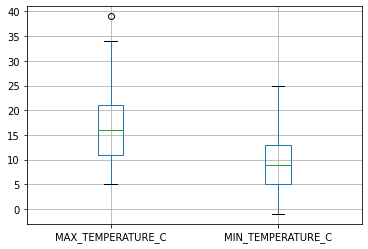

In [ ]:
df_weather.boxplot();

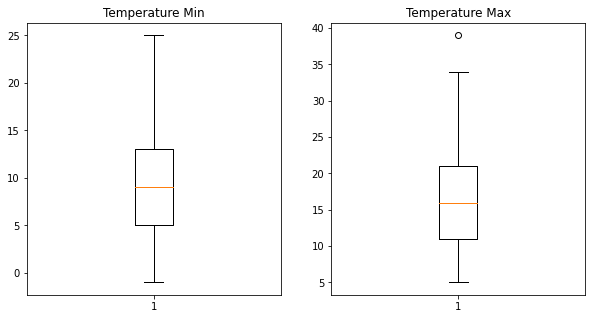

In [ ]:
# Your code here :
fig, tempbox = plt.subplots(figsize = (10,5), nrows=1, ncols=2)
tempbox[0].boxplot(df_weather['MIN_TEMPERATURE_C'])
tempbox[0].set_title('Temperature Min')
tempbox[1].boxplot(df_weather['MAX_TEMPERATURE_C'])
tempbox[1].set_title('Temperature Max');

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips :
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

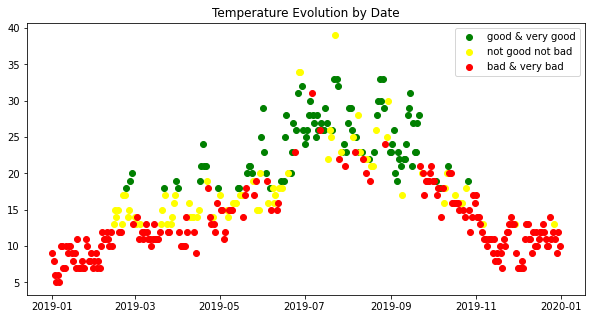

In [ ]:
df_weather['OPINION'].unique()

array(['very bad', 'bad', 'not good not bad', 'good', 'very good'],
      dtype=object)

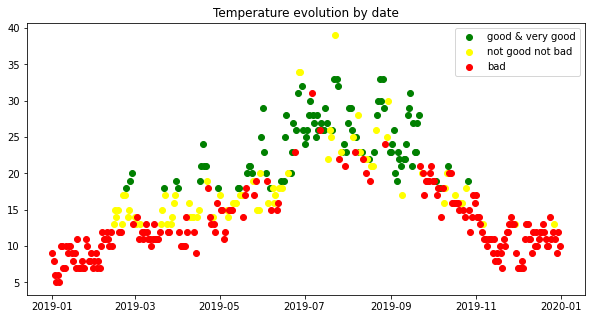

In [ ]:
# It's your turn now :

# Pandas DataFrames
df_good = df_weather.loc[(df_weather['OPINION'] == "good") | (df_weather['OPINION'] == "very good")]
df_neutral = df_weather.loc[(df_weather['OPINION'] == "not good not bad")]
df_bad = df_weather.loc[(df_weather['OPINION'] == "bad") | (df_weather['OPINION'] == "very bad")]

# MatPlotLib PyPlot plot
plt.figure(figsize=(10,5))
plot_good = plt.scatter(x = df_good["DATE"], y = df_good["MAX_TEMPERATURE_C"], label = df_good["OPINION"], c = 'green')
plot_neutral = plt.scatter(x = df_neutral["DATE"], y = df_neutral["MAX_TEMPERATURE_C"], label = df_neutral["OPINION"], c = 'yellow')
plot_bad = plt.scatter(x = df_bad["DATE"], y = df_bad["MAX_TEMPERATURE_C"], label = df_bad["OPINION"], c = 'red')
plt.title('Temperature evolution by date')
plt.legend([plot_good, plot_neutral, plot_bad],['good & very good', 'not good not bad','bad'], loc='upper right')

plt.show()

In [ ]:
# Other possible solution:
plt.figure(figsize=(10,5))
plt.scatter(x = bad.DATE, y = (bad.MAX_TEMPERATURE_C), label = 'good & very good',c="lightcoral",marker='^')
plt.scatter(x = good.DATE, y = (good.MAX_TEMPERATURE_C),label = 'not good not bad', c= 'lightseagreen',marker='>')
plt.scatter(x = meh.DATE, y = (meh.MAX_TEMPERATURE_C),label = 'bad & very bad', c= 'blueviolet',marker='v')
plt.title('Temperatures Evolution By Date')
plt.legend(loc="best")
plt.show()

# Other possible solution:
plt.figure(figsize=(10,5))
df1= df_weather[(df_weather.OPINION=='bad')|(df_weather.OPINION=='very bad')]

plt.scatter(df_weather[(df_weather.OPINION=='good')|(df_weather.OPINION=='very good')].DATE,df_weather[(df_weather.OPINION=='good')|(df_weather.OPINION=='very good')].MAX_TEMPERATURE_C,c='green',label='good & very good')
plt.scatter(df_weather[(df_weather.OPINION== "not good not bad")].DATE,df_weather[(df_weather.OPINION== "not good not bad")].MAX_TEMPERATURE_C,c='yellow',label='not good not bad')
plt.scatter(df1.DATE,df1.MAX_TEMPERATURE_C,c='red',label='bad & very bad')
plt.legend()
plt.title('Temperature Evolution by Date');